
### EXP1-Gambling SPM maps

#### *Preprocessing:*
- Niak preprocessed GAMBLING task (new scrub method)

#### *run  SPM-Maps separetly for each trial:*

```
   Mental interaction
   Random interaction
   Mental Vs random
  
```

In [1]:
from nilearn import plotting
import os,glob
import numpy as np
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = '/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016';
path_rmaps = os.path.join(path_root,"hcp_gamb_activation_maps_18-Jun-2017/group_maps/")
path_spm = os.path.join(path_root,"hcp_gamb_activation_maps_18-Jun-2017")
rmaps_file_pattern = "{}.nii.gz"

In [4]:
# get networks names
#keep_event  = ['win_event','win_event_vs_loss_event']

In [5]:
trial_names = [f[:-7]  for f in os.listdir(path_rmaps)]
#mask_trial = [t in keep_event for t in trial_names]
#trial_names = [x for i,x in enumerate(trial_names) if mask_trial[i] ]

In [6]:
trial_names

['loss_event',
 'win_vs_loss',
 'win_event',
 'neut_event',
 'loss',
 'win_event_vs_neut_event',
 'win',
 'win_event_vs_loss_event',
 'loss_event_vs_neut_event']

In [7]:
task_name = path_spm.split('/')[-1].split('_')[1]
task_name

'gamb'

## 3D Group maps for connectome viewer 

In [9]:
# Copy spec template
command = ' '.join(['scp', os.path.join(path_root,'templates/template_spec.spec'),
                    os.path.join(path_spm,'{}_spec.spec'.format(task_name))])
os.system(command)

# Convert vol to surf and populate spec file 
for idx,trial_name in enumerate(trial_names):
    # subtype volume
    file_in =os.path.join(path_rmaps,rmaps_file_pattern.format(trial_name))
    # convert to mesh
    list_templates =['lh','rh','cerebellum']
    for template in list_templates:
        template_file = os.path.join(path_root,'templates/{}.surf.gii'.format(template))
        file_out =  os.path.join(path_spm,'group_spm_{}_{}.surf.gii'.format(template,trial_name))
        command = ' '.join(['wb_command -volume-to-surface-mapping',
                            file_in , template_file , file_out ,'-enclosing'])
        os.system(command)
        # Fill spec file
        with open(os.path.join(path_spm,'{}_spec.spec'.format(task_name)),"a") as f:
            if template == 'cerebellum':
                print('   <DataFile Structure="Cerebellum"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'rh':
                print('   <DataFile Structure="CortexRight"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'lh':
                print('   <DataFile Structure="CortexLeft"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
        
with open(os.path.join(path_spm,'{}_spec.spec'.format(task_name)),"a") as f:
    print('</CaretSpecFile>',file=f)

## 2D Group maps

(53, 64, 52) is the shape of for trial:  loss_event
Min = -22.194; Max = 32.396
(53, 64, 52) is the shape of for trial:  win_vs_loss
Min = -10.898; Max = 10.879
(53, 64, 52) is the shape of for trial:  win_event
Min = -21.993; Max = 32.733
(53, 64, 52) is the shape of for trial:  neut_event
Min = -21.084; Max = 32.592
(53, 64, 52) is the shape of for trial:  loss
Min = -31.795; Max = 22.066
(53, 64, 52) is the shape of for trial:  win_event_vs_neut_event
Min = -22.778; Max = 29.010
(53, 64, 52) is the shape of for trial:  win
Min = -32.481; Max = 22.041
(53, 64, 52) is the shape of for trial:  win_event_vs_loss_event
Min = -11.981; Max = 23.292
(53, 64, 52) is the shape of for trial:  loss_event_vs_neut_event
Min = -24.020; Max = 25.685
SPM map from HCP Paper


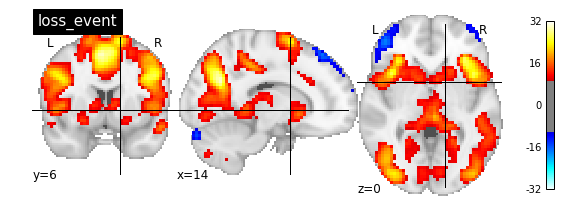

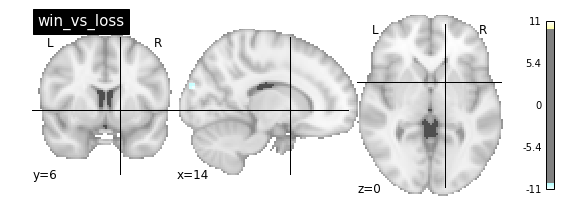

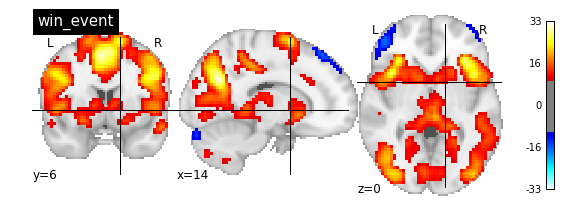

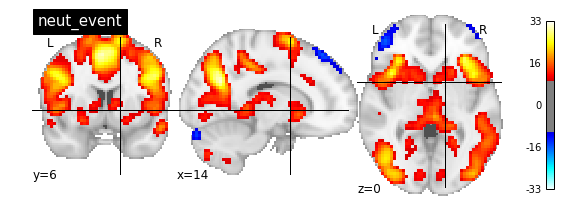

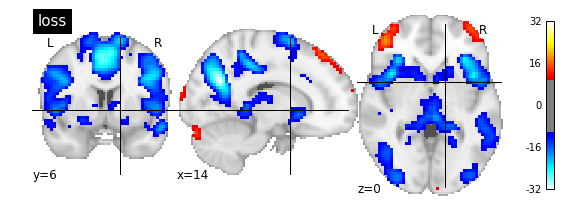

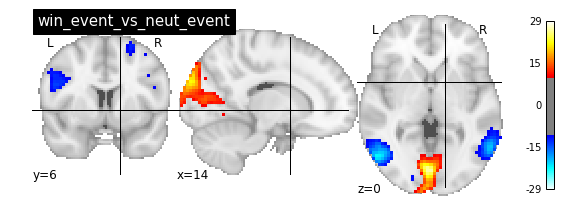

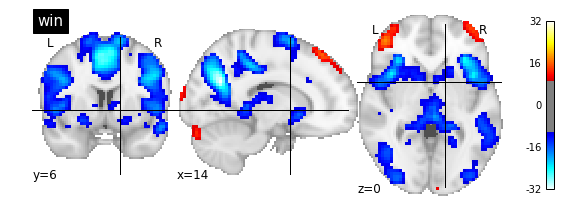

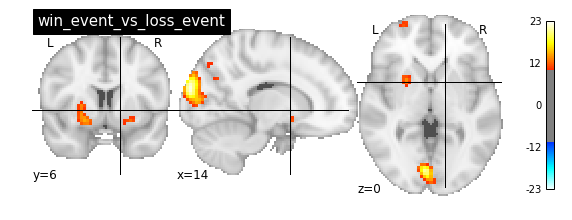

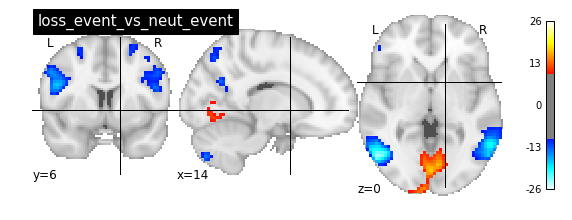

In [32]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= 10,
                                     cut_coords=(14,6, 0),
                                     title= "%s" % trial
                                    )
from IPython.display import Image
print ("SPM map from HCP Paper")
Image(url= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4011498/bin/nihms569034f6.jpg")

SPM map for loss_event trial
SPM map for win_vs_loss trial
SPM map for win_event trial
SPM map for neut_event trial
SPM map for loss trial
SPM map for win_event_vs_neut_event trial
SPM map for win trial


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SPM map for win_event_vs_loss_event trial
SPM map for loss_event_vs_neut_event trial


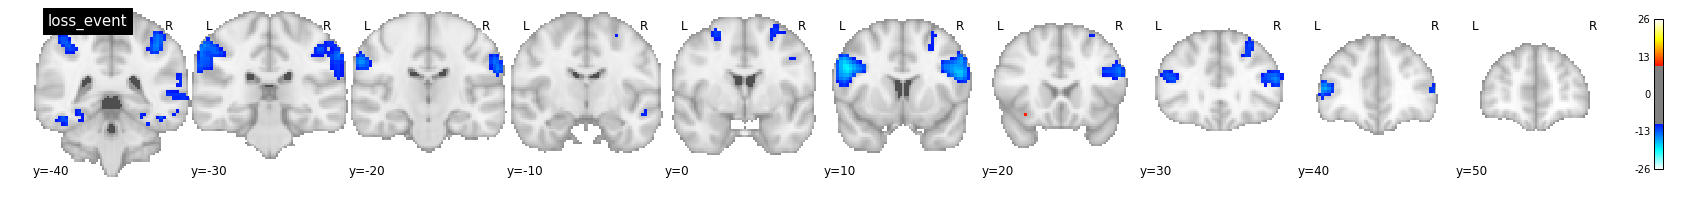

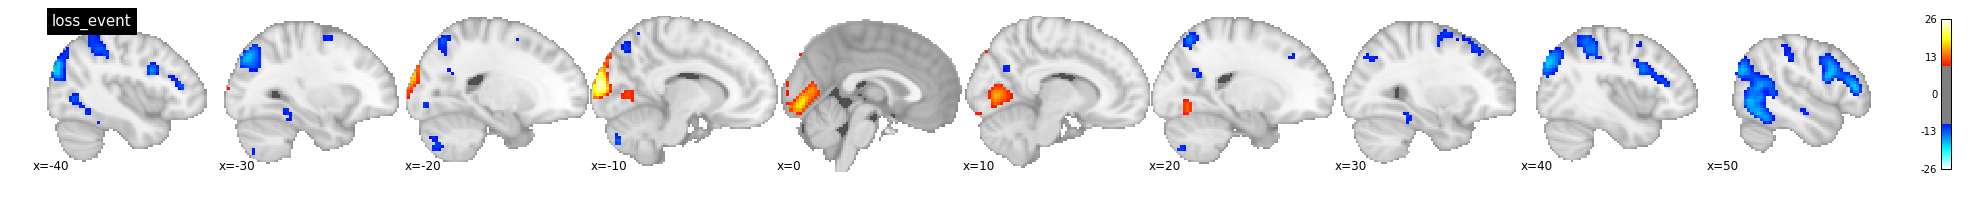

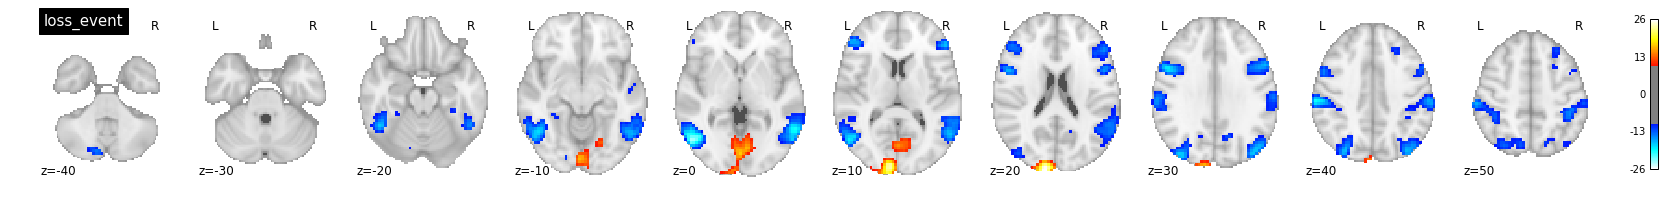

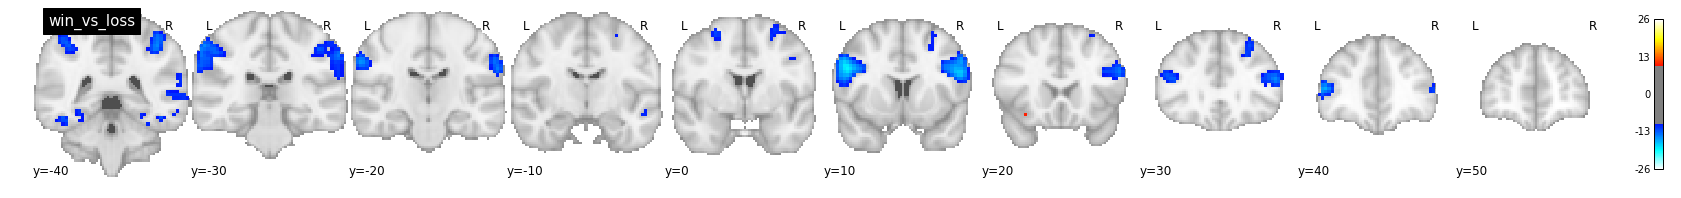

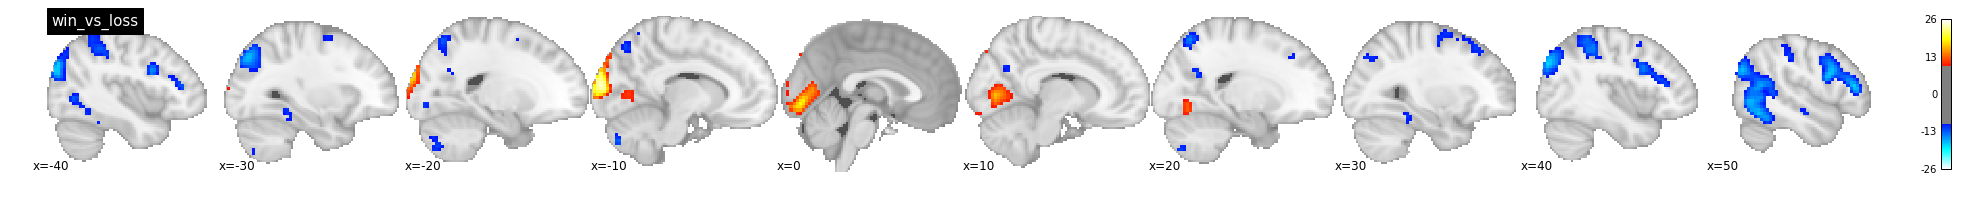

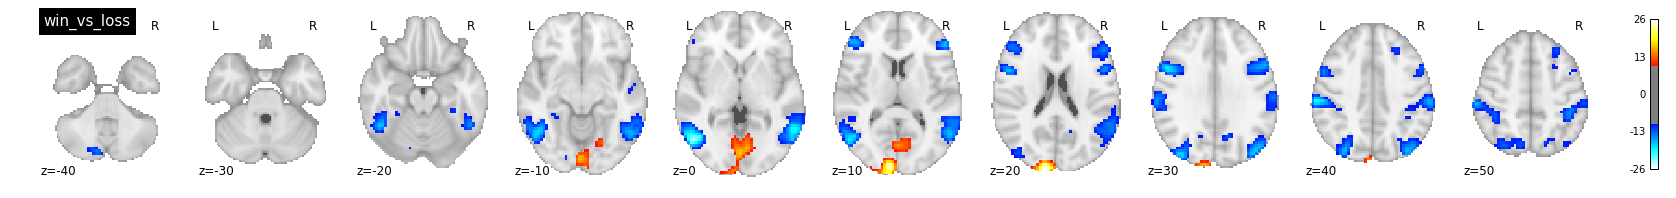

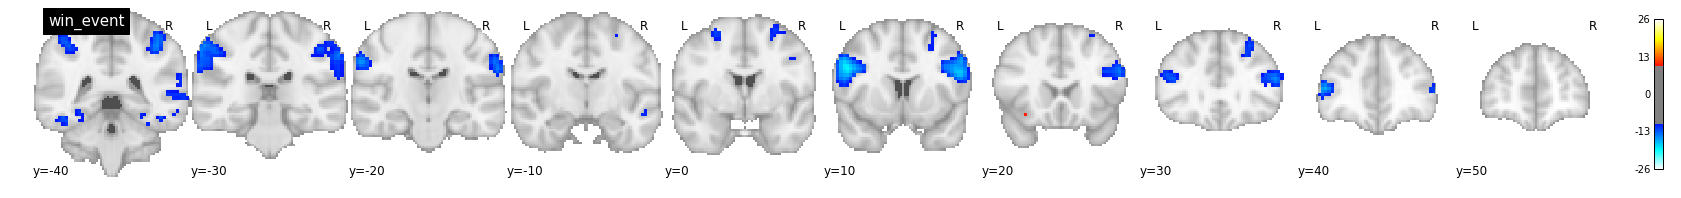

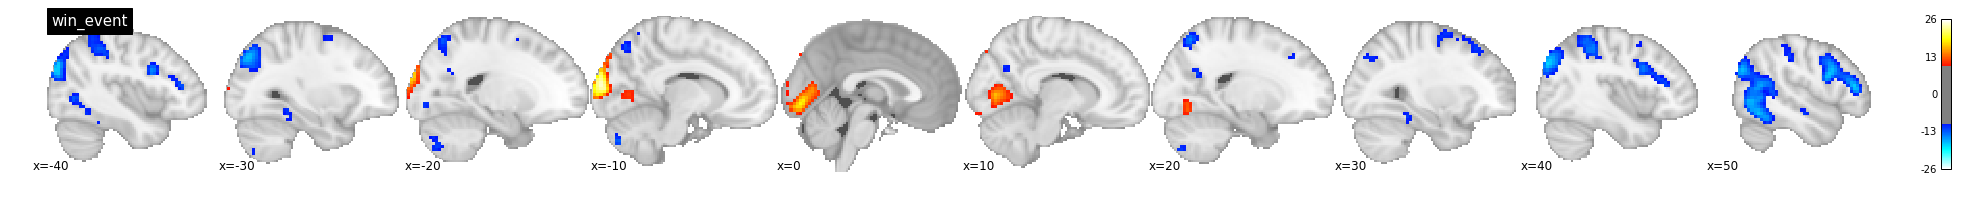

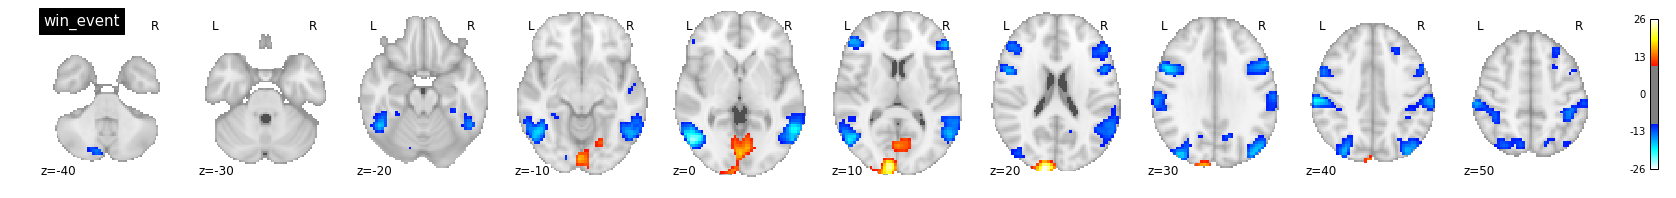

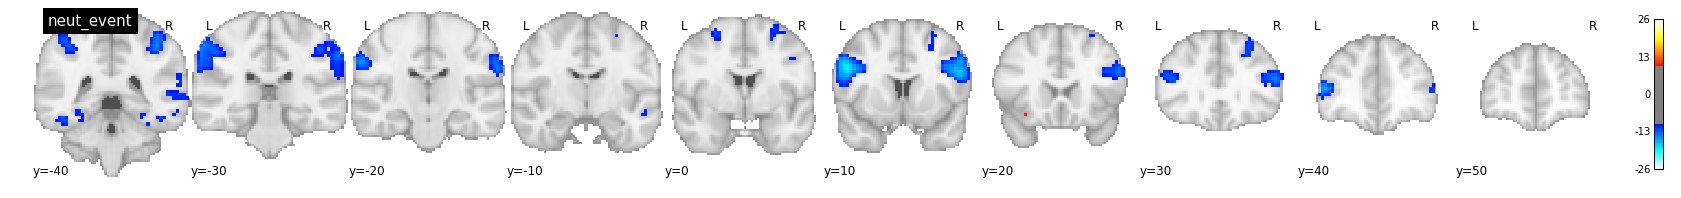

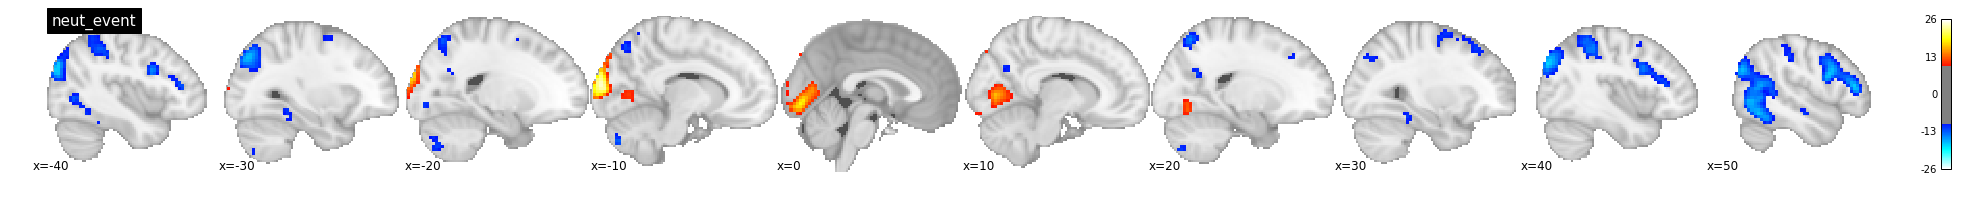

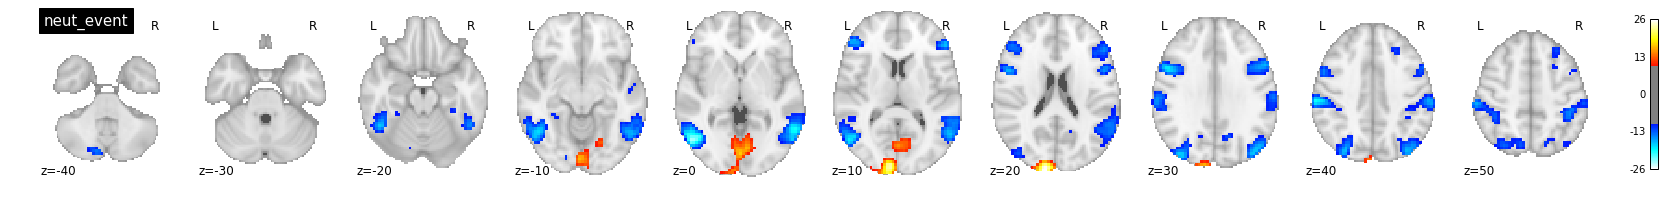

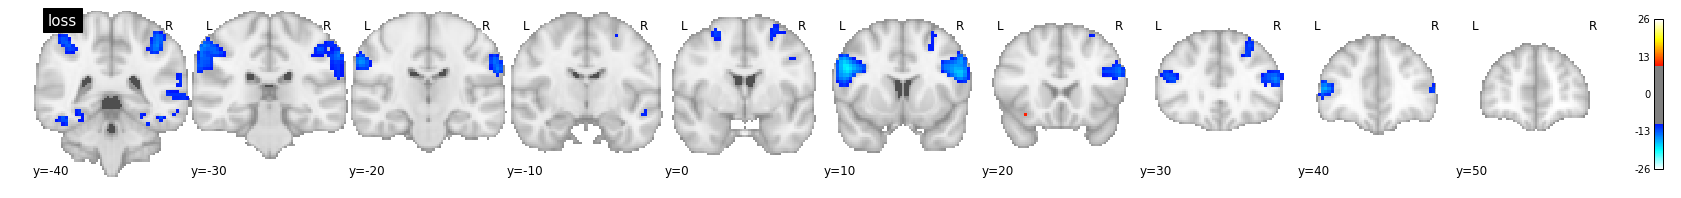

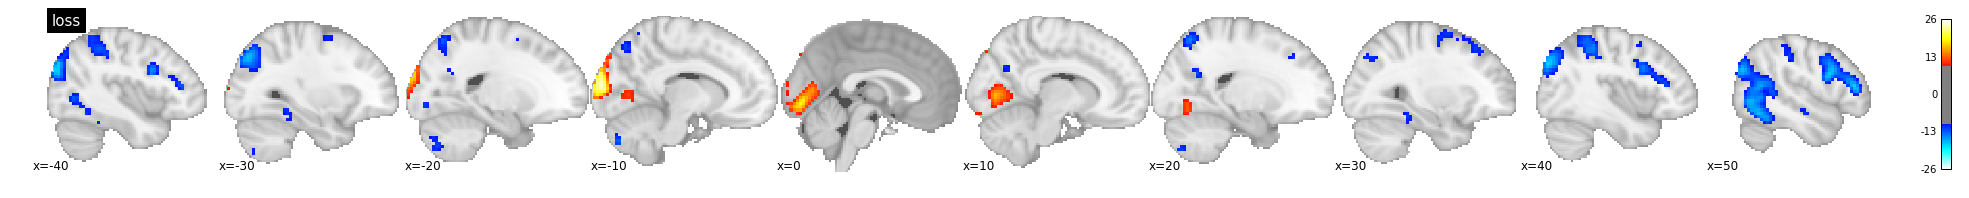

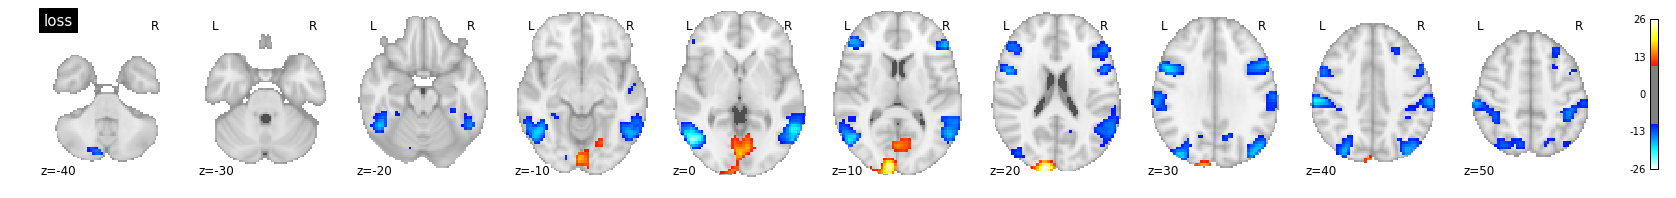

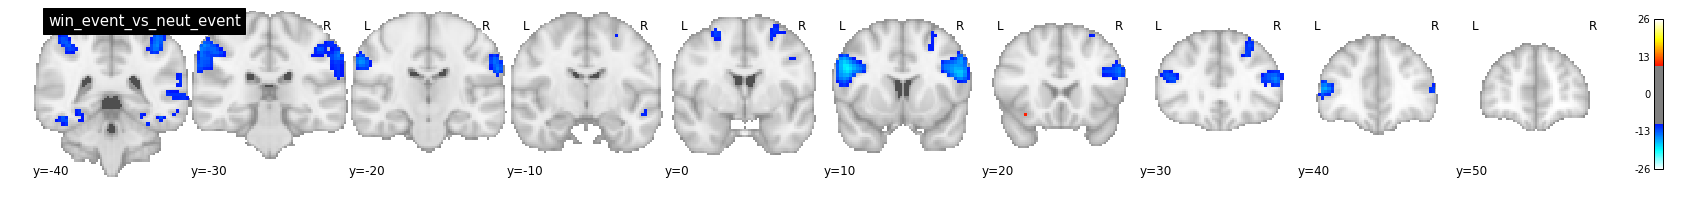

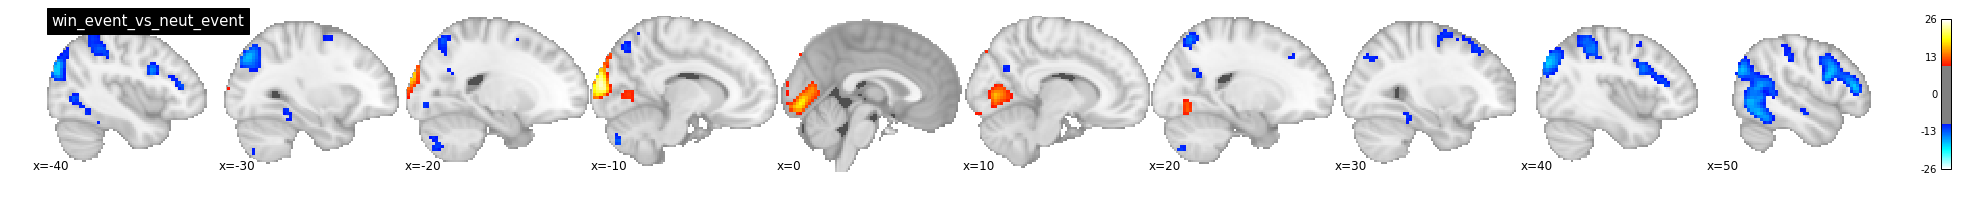

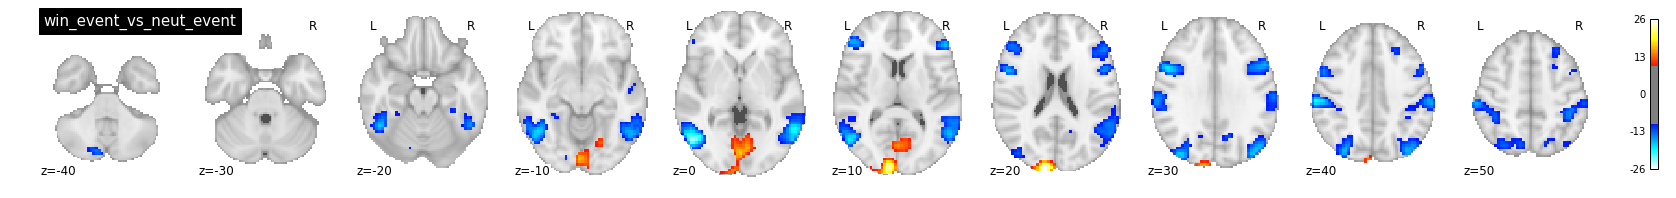

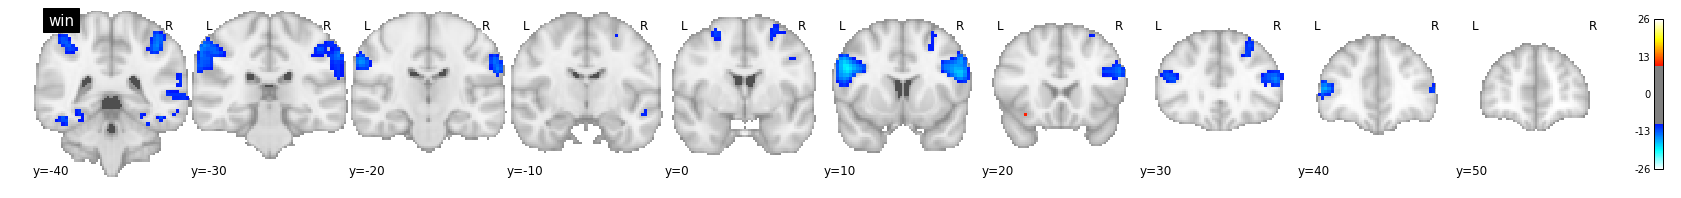

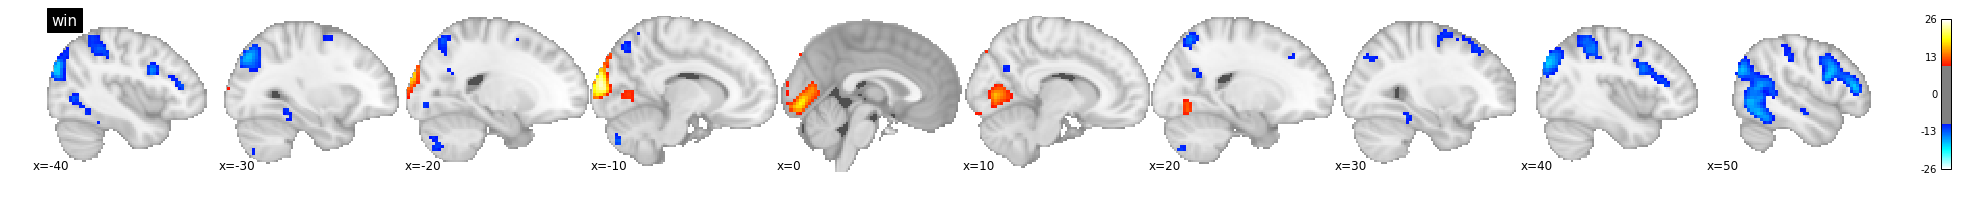

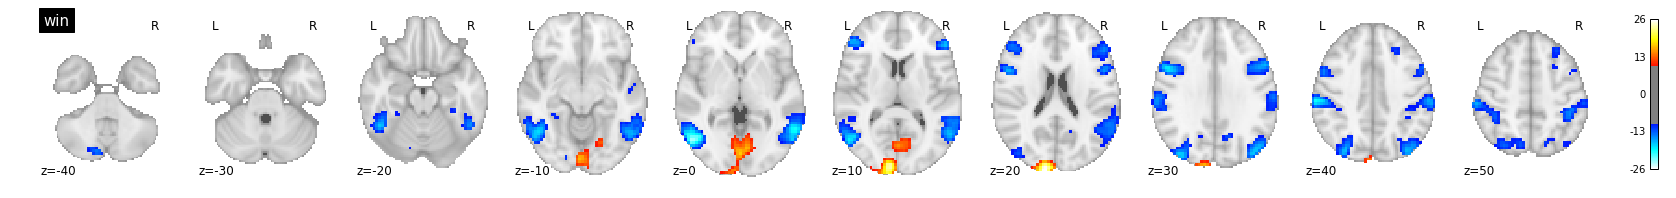

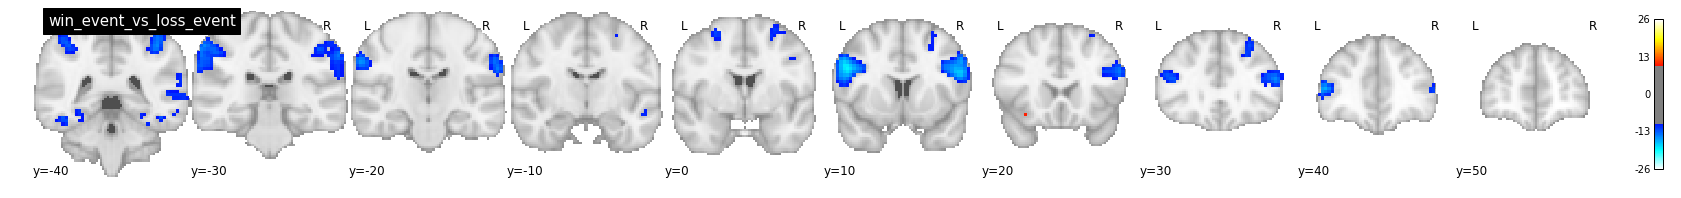

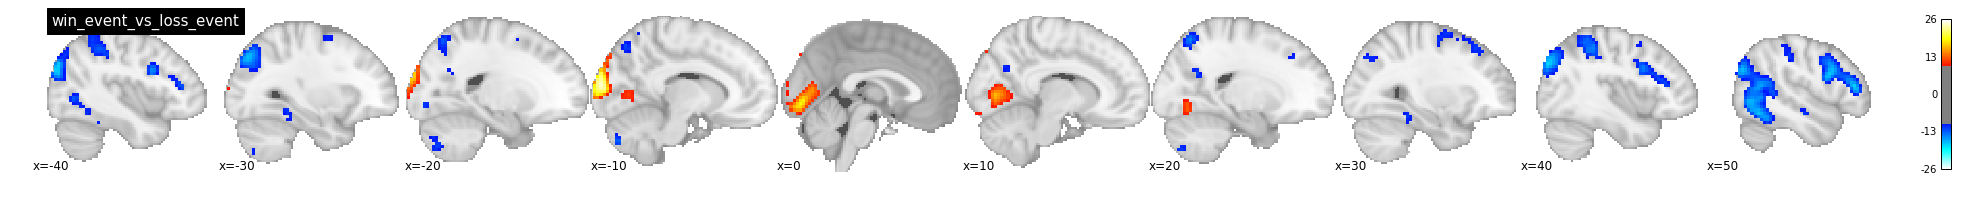

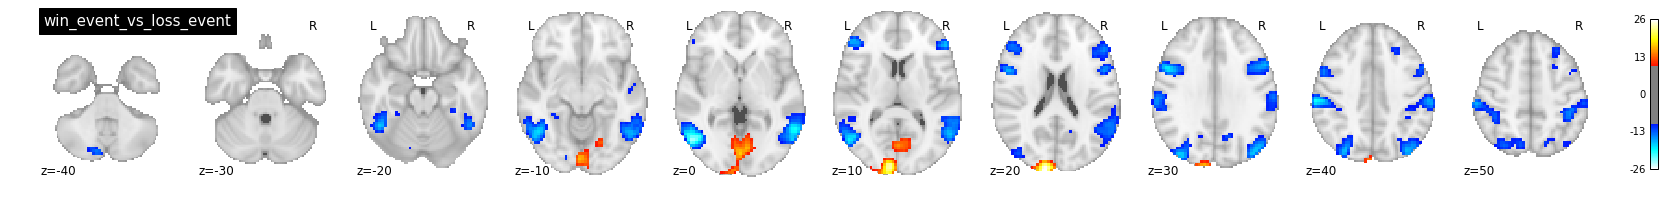

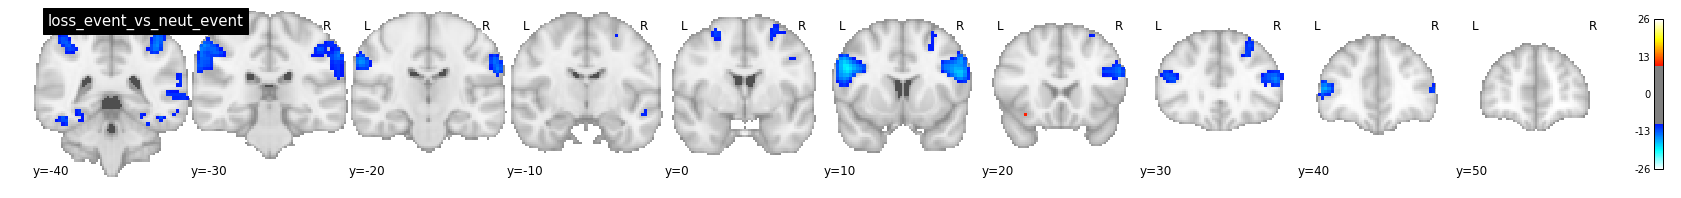

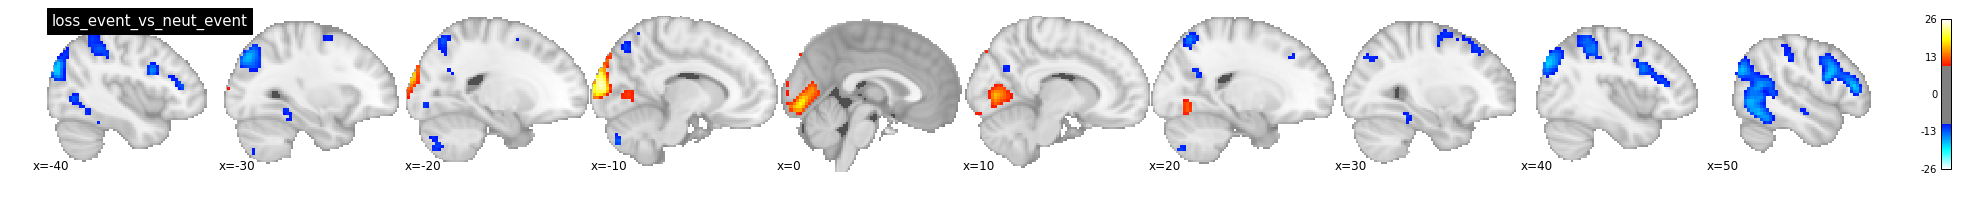

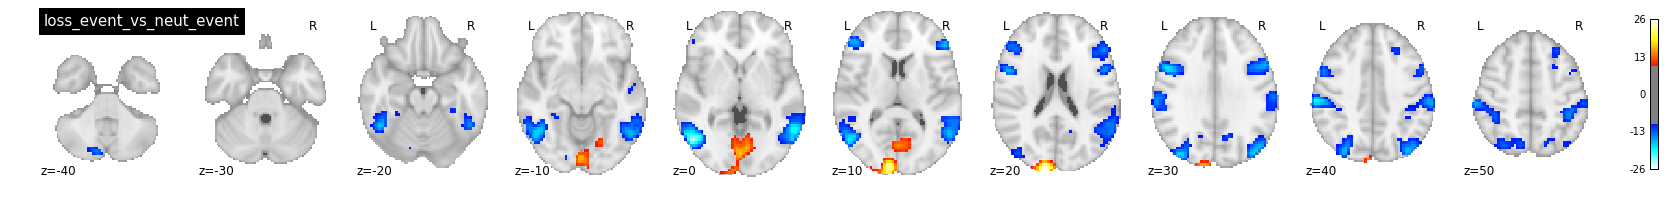

In [33]:
for index, trial in enumerate(trial_names):    
    print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 10,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
